In [1]:
# 基本信息
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#  股票数据的获取
import pandas_datareader as pdr

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# time
from datetime import datetime

In [4]:
start = datetime(2015,9,20)
alibaba = pdr.get_data_yahoo('BABA', start=start)
amazon = pdr.get_data_yahoo('AMZN', start=start)

In [5]:
alibaba.to_csv('homework/BABA.csv')

In [6]:
amazon.to_csv('homework/AMZN.csv')

In [7]:
!ls homework

AMZN.csv           city_weather.csv   iris.csv           usa_flights.csv
BABA.csv           demo_duplicate.csv movie_metadata.csv
apply_demo.csv     flights.csv        sales-funnel.xlsx


In [8]:
alibaba.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1725 entries, 2015-09-21 to 2022-07-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1725 non-null   float64
 1   Low        1725 non-null   float64
 2   Open       1725 non-null   float64
 3   Close      1725 non-null   float64
 4   Volume     1725 non-null   int64  
 5   Adj Close  1725 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 94.3 KB


<AxesSubplot:xlabel='Date'>

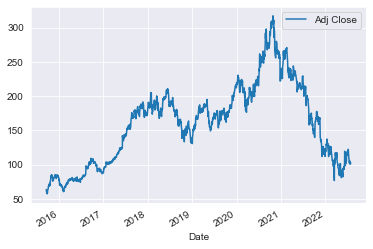

In [9]:
alibaba['Adj Close'].plot(legend=True)

<AxesSubplot:xlabel='Date'>

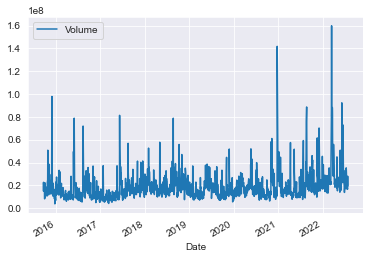

In [10]:
alibaba['Volume'].plot(legend=True)

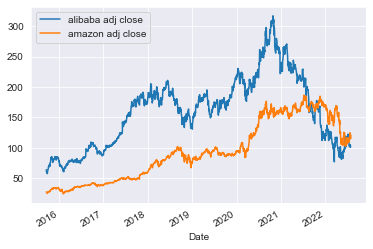

In [12]:
alibaba['Adj Close'].plot(label='alibaba adj close')
amazon['Adj Close'].plot(label='amazon adj close')
plt.legend()

In [13]:
alibaba['high-low'] = alibaba['High'] - alibaba['Low']

In [14]:
alibaba.head()

,High,Low,Open,Close,Volume,Adj Close,high-low
Date,,,,,,,
2015-09-21,66.400002,62.959999,65.379997,63.900002,22355100,63.900002,3.440002
2015-09-22,63.270000,61.580002,62.939999,61.900002,14897900,61.900002,1.689999
2015-09-23,62.299999,59.680000,61.959999,60.000000,22684600,60.000000,2.619999
2015-09-24,60.340000,58.209999,59.419998,59.919998,20645700,59.919998,2.130001
2015-09-25,60.840000,58.919998,60.630001,59.240002,17009100,59.240002,1.920002


<AxesSubplot:xlabel='Date'>

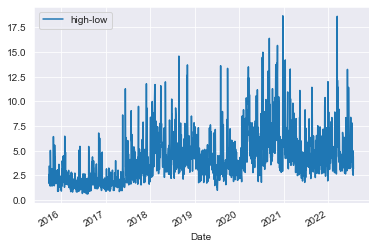

In [15]:
alibaba['high-low'].plot(legend=True)

In [16]:
# daily return 每天的变化情况
alibaba['Adj Close'].pct_change()

Date
2015-09-21         NaN
2015-09-22   -0.031299
2015-09-23   -0.030695
2015-09-24   -0.001333
2015-09-25   -0.011348
                ...   
2022-07-21    0.011254
2022-07-22   -0.042994
2022-07-25    0.004473
2022-07-26    0.003760
2022-07-27    0.013210
Name: Adj Close, Length: 1725, dtype: float64

In [17]:
alibaba['daily-return'] = alibaba['Adj Close'].pct_change()

<AxesSubplot:xlabel='Date'>

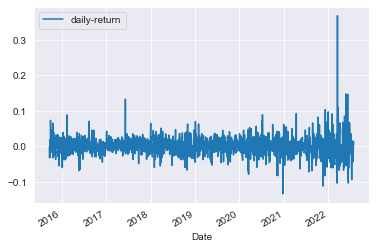

In [18]:
alibaba['daily-return'].plot(legend=True)

<AxesSubplot:xlabel='Date'>

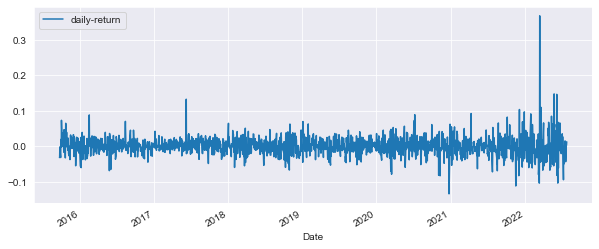

In [19]:
alibaba['daily-return'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

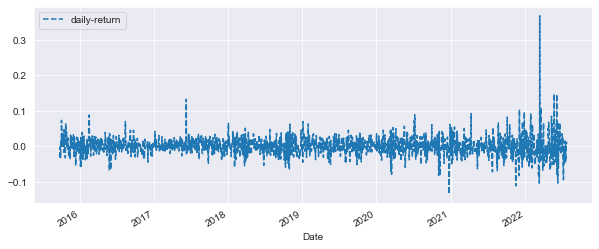

In [20]:
alibaba['daily-return'].plot(legend=True, figsize=(10,4), linestyle='--')

<AxesSubplot:xlabel='Date'>

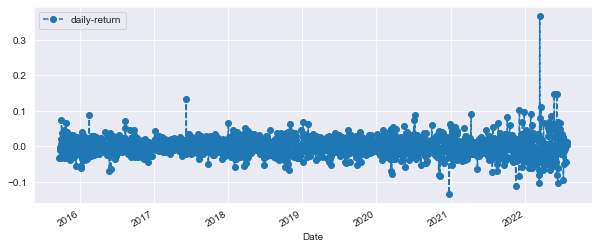

In [21]:
alibaba['daily-return'].plot(legend=True, figsize=(10,4), linestyle='--', marker='o')

<AxesSubplot:ylabel='Frequency'>

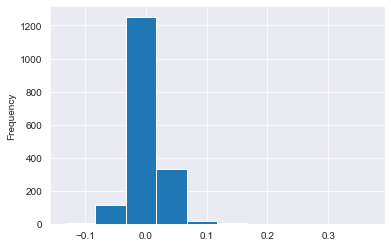

In [22]:
alibaba['daily-return'].plot(kind='hist')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily-return', ylabel='Density'>

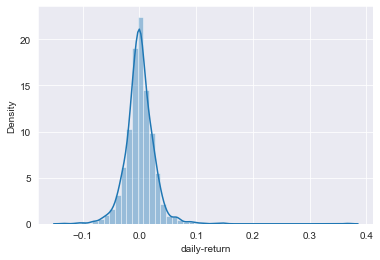

In [23]:
sns.distplot(alibaba['daily-return'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily-return', ylabel='Density'>

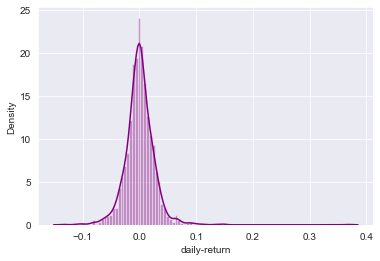

In [24]:
sns.distplot(alibaba['daily-return'].dropna(), bins=100, color='purple')